## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow
import keras

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

## Menyiapkkan Dataset MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


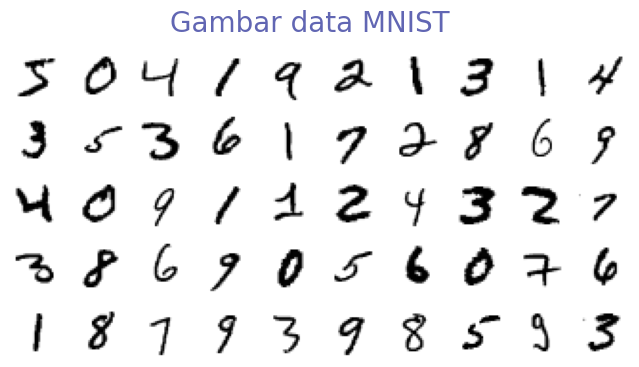

In [3]:
# Menampilkan gambar dari data MNIST
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#6166B3")

plt.show()

## Mencetak Informasi Dataset MNIST

In [4]:
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


## Reshape dan Normalisasi data

In [5]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


## Pemodelan ANN

In [6]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

In [8]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)

In [9]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Pelatihan dan Pengujian Dataset

In [10]:
history = nn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5028 - accuracy: 0.8500
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3177 - accuracy: 0.9062
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2794 - accuracy: 0.9179
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2519 - accuracy: 0.9228
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2400 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2265 - accuracy: 0.9299
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2234 - accuracy: 0.9309
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2124 - accuracy: 0.9326
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2088 - accuracy: 0.9340
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.205

## Hasil Visualisasi Evaluasi

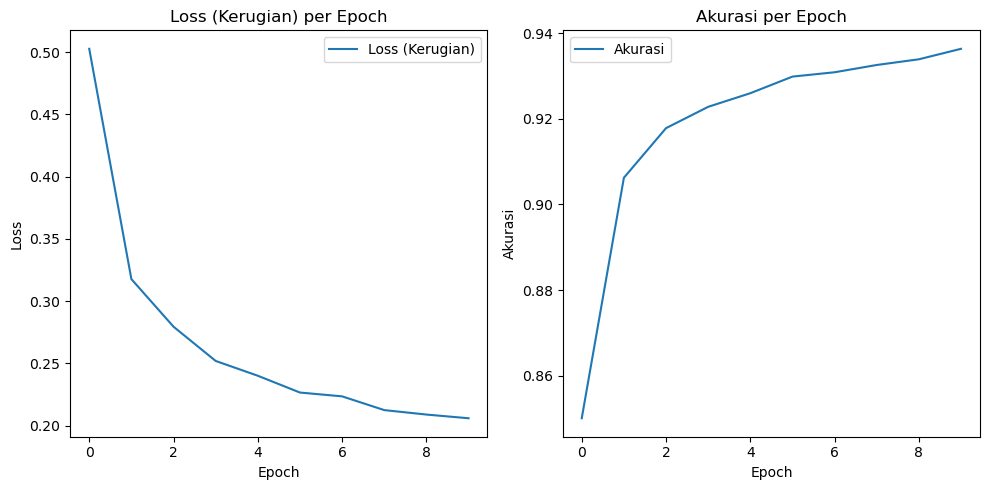

In [11]:
# Visualisasi loss (kerugian)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Kerugian)')
plt.title('Loss (Kerugian) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualisasi akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

## Confusion Matrix

In [12]:
# Menghitung akurasi model pada data pengujian menggunakan prediksi yang dihasilkan sebelumnya
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 [==============================] - 0s 767us/step


0.9597

In [13]:
# Menghitung confusion matrix berdasarkan label sebenarnya (y_test) dan label prediksi (y_pred)
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 968,    0,    1,    2,    1,    2,    4,    1,    1,    0],
       [   0, 1108,    5,    2,    0,    1,    2,    3,   14,    0],
       [   6,    3,  977,   13,    5,    0,    5,    8,   15,    0],
       [   0,    0,    7,  982,    1,    4,    0,    8,    7,    1],
       [   2,    1,    5,    0,  944,    0,    4,    2,    5,   19],
       [   6,    0,    2,   25,    2,  832,    9,    2,   10,    4],
       [  10,    4,    2,    2,    7,    7,  923,    0,    3,    0],
       [   2,    4,   13,    7,    3,    0,    0,  987,    0,   12],
       [  10,    3,    2,   14,    6,    6,    3,   10,  918,    2],
       [   3,    4,    0,    9,   17,    6,    0,    8,    4,  958]],
      dtype=int64)

<Axes: >

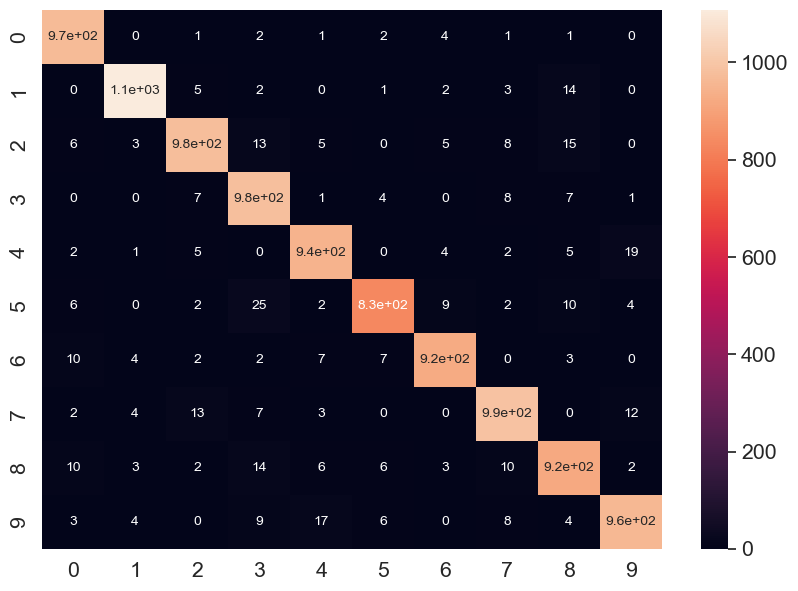

In [14]:
# Membuat visualisasi Confusion Matrix
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size